In [1]:

import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import time
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 데이터셋이 위치한 경로
# 여러분들이 다운로드 받은 데이터셋의 경로를 찍어주시면 됩니다.
data_dir = '/Users/stancho/Documents/서강대학교/동아리/Parrot/팀프로젝트/cnn/CUB_200_2011/images'

In [3]:
#기존 데이터
image_folders = os.listdir(data_dir)

for folder_name in image_folders:
    if os.path.isdir(os.path.join(data_dir, folder_name)):
        # 폴더 이름에서 앞의 세 자리 숫자와 마침표를 제거하고 알파벳을 소문자로 변경
        new_name = folder_name[4:].lower()
        # 폴더의 전체 경로 변경
        os.rename(os.path.join(data_dir, folder_name), os.path.join(data_dir, new_name))
        print(f"{folder_name} -> {new_name}")

005.Crested_Auklet -> crested_auklet
015.Lazuli_Bunting -> lazuli_bunting
156.White_eyed_Vireo -> white_eyed_vireo
081.Pied_Kingfisher -> pied_kingfisher
135.Bank_Swallow -> bank_swallow
200.Common_Yellowthroat -> common_yellowthroat
086.Pacific_Loon -> pacific_loon
067.Anna_Hummingbird -> anna_hummingbird
076.Dark_eyed_Junco -> dark_eyed_junco
149.Brown_Thrasher -> brown_thrasher
127.Savannah_Sparrow -> savannah_sparrow
041.Scissor_tailed_Flycatcher -> scissor_tailed_flycatcher
141.Artic_Tern -> artic_tern
082.Ringed_Kingfisher -> ringed_kingfisher
099.Ovenbird -> ovenbird
013.Bobolink -> bobolink
104.American_Pipit -> american_pipit
023.Brandt_Cormorant -> brandt_cormorant
168.Kentucky_Warbler -> kentucky_warbler
072.Pomarine_Jaeger -> pomarine_jaeger
040.Olive_sided_Flycatcher -> olive_sided_flycatcher
185.Bohemian_Waxwing -> bohemian_waxwing
144.Common_Tern -> common_tern
034.Gray_crowned_Rosy_Finch -> gray_crowned_rosy_finch
126.Nelson_Sharp_tailed_Sparrow -> nelson_sharp_tailed_s

In [4]:
#외부데이터
extra_dir = '/Users/stancho/Documents/서강대학교/동아리/Parrot/팀프로젝트/cnn/train'

image_extra_folders = os.listdir(extra_dir)

for extra_folder_name in image_extra_folders:
    if os.path.isdir(os.path.join(extra_dir, extra_folder_name)):
        # 폴더 이름에서 앞의 세 자리 숫자와 마침표를 제거하고 알파벳을 소문자로 변경
        new_extra_name = extra_folder_name.replace(' ', '_').lower()
        # 폴더의 전체 경로 변경
        os.rename(os.path.join(extra_dir, extra_folder_name), os.path.join(extra_dir, new_extra_name))
        print(f"{extra_folder_name} -> {new_extra_name}")


red_billed_tropicbird -> red_billed_tropicbird
kookaburra -> kookaburra
house_finch -> house_finch
cape_may_warbler -> cape_may_warbler
striated_caracara -> striated_caracara
hoopoes -> hoopoes
crane_hawk -> crane_hawk
fairy_bluebird -> fairy_bluebird
phainopepla -> phainopepla
black_necked_stilt -> black_necked_stilt
gouldian_finch -> gouldian_finch
hoatzin -> hoatzin
black_throated_bushtit -> black_throated_bushtit
indian_vulture -> indian_vulture
northern_red_bishop -> northern_red_bishop
hawaiian_goose -> hawaiian_goose
takahe -> takahe
black_swan -> black_swan
shoebill -> shoebill
wood_duck -> wood_duck
scarlet_faced_liocichla -> scarlet_faced_liocichla
brandt_cormarant -> brandt_cormarant
red_tailed_thrush -> red_tailed_thrush
northern_cardinal -> northern_cardinal
altamira_yellowthroat -> altamira_yellowthroat
puffin -> puffin
wood_thrush -> wood_thrush
azaras_spinetail -> azaras_spinetail
hooded_merganser -> hooded_merganser
palila -> palila
spotted_catbird -> spotted_catbird
j

In [13]:
import shutil

# 디렉토리 경로 설정
extra_dir = '/Users/stancho/Documents/서강대학교/동아리/Parrot/팀프로젝트/cnn/train'
data_dir = '/Users/stancho/Documents/서강대학교/동아리/Parrot/팀프로젝트/cnn/CUB_200_2011'

# extra_dir의 각 폴더를 반복하여 처리
for folder in os.listdir(extra_dir):
    # 폴더 이름과 일치하는 파일 또는 폴더가 data_dir/images 안에 있는지 확인
    src_folder = os.path.join(data_dir, 'images', folder)
    if os.path.exists(src_folder):
        # 이미지 파일들을 대상 폴더로 옮기기
        src_images = os.path.join(extra_dir, folder)
        for file in os.listdir(src_images):
            src_file = os.path.join(src_images, file)
            dst_file = os.path.join(src_folder, file)
            shutil.move(src_file, dst_file)

        print(f"외부데이터 '{folder}'의 이미지를 images로 옮겼습니다.")


외부데이터 'cape_may_warbler'의 이미지를 images로 옮겼습니다.
외부데이터 'hooded_merganser'의 이미지를 images로 옮겼습니다.
외부데이터 'spotted_catbird'의 이미지를 images로 옮겼습니다.
외부데이터 'indigo_bunting'의 이미지를 images로 옮겼습니다.
외부데이터 'red_faced_cormorant'의 이미지를 images로 옮겼습니다.
외부데이터 'northern_fulmar'의 이미지를 images로 옮겼습니다.
외부데이터 'barn_swallow'의 이미지를 images로 옮겼습니다.
외부데이터 'belted_kingfisher'의 이미지를 images로 옮겼습니다.
외부데이터 'chipping_sparrow'의 이미지를 images로 옮겼습니다.
외부데이터 'cedar_waxwing'의 이미지를 images로 옮겼습니다.
외부데이터 'ovenbird'의 이미지를 images로 옮겼습니다.
외부데이터 'dark_eyed_junco'의 이미지를 images로 옮겼습니다.
외부데이터 'baltimore_oriole'의 이미지를 images로 옮겼습니다.
외부데이터 'brown_thrasher'의 이미지를 images로 옮겼습니다.
외부데이터 'mangrove_cuckoo'의 이미지를 images로 옮겼습니다.
외부데이터 'loggerhead_shrike'의 이미지를 images로 옮겼습니다.
외부데이터 'scarlet_tanager'의 이미지를 images로 옮겼습니다.
외부데이터 'american_redstart'의 이미지를 images로 옮겼습니다.
외부데이터 'cape_glossy_starling'의 이미지를 images로 옮겼습니다.
외부데이터 'european_goldfinch'의 이미지를 images로 옮겼습니다.
외부데이터 'painted_bunting'의 이미지를 images로 옮겼습니다.
외부데이터 'blue_grosbeak'의 이미지를 images로 옮겼습니다.
외부데이

In [14]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import time
import os
from tqdm import tqdm

In [15]:
def get_data_transforms():
    data_transforms = {
        'train': transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter()]), p=0.1),
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            transforms.RandomErasing(p=0.25, value='random'),
            #transforms.GaussianBlur(kernel_size=23),  # Add a comma here
        ]),
        'val': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    return data_transforms

if __name__ == "__main__":
    data_transforms = get_data_transforms()


In [16]:
# 여기는 건들지 말아주세요!

# 이미지 데이터셋 불러오기
full_dataset = datasets.ImageFolder(os.path.join(data_dir, 'images'),
                                          data_transforms['train'])

# 클래스명
class_names = full_dataset.classes

In [17]:
# 데이터셋을 train과 valid로 나누기
train_size = int(0.7 * len(full_dataset))
valid_size = len(full_dataset) - train_size
train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])

# 데이터 로더
# 만약 CUDA out of Memory가 뜬다면
# 1. batch_size를 줄이거나,
# 2. 모델을 가벼운 걸로 바꾸거나
# 3. data_transforms 에서 Resize 부분을 작게해서 이미지 사이즈를 줄여주세요.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False, num_workers=2)

In [18]:
# GPU 사용 가능 확인
# device(type='cuda', index=0) 가 뜬다면 GPU에서 훈련이 가능해지고 더 빨라집니다.
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"
device

device(type='mps')

In [19]:
!pip install efficientnet_pytorch

In [20]:
from efficientnet_pytorch import EfficientNet

# Load the EfficientNet model
class EfficientNet_Model(nn.Module):
    def __init__(self, num_classes=1000, model_name='efficientnet-b0'):
        super(EfficientNet_Model, self).__init__()
        self.model = EfficientNet.from_pretrained(model_name)
        in_features = self.model._fc.in_features

        # Modify the classifier to match the number of desired output classes
        self.model._fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Usage
model = EfficientNet_Model(model_name='efficientnet-b0')

# Assuming you have a list named 'class_names' containing the names of your classes
# Replace len(class_names) with the actual number of classes in your specific task.

# 새로운 분류기를 마지막 레이어에 추가
num_ftrs = model.model._fc.in_features
model.model._fc = nn.Linear(num_ftrs, len(class_names))

# 모델 GPU에 올리기
model = model.to(device)


Loaded pretrained weights for efficientnet-b0


In [21]:
# 손실 함수와 optimizer 설정
# optimizer도 다양하게 바꿔가면서 해보시면 좋습니다. 특히 lr (학습률) 관련해서 잘 설정해주세요
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

# scheduler 설정
# torch.optim.lr_scheduler에 보면 다양한 scheduler가 존재합니다. 한번 확인해보고 다양하게 시도해보세요
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# epoch 횟수 설정
num_epochs=20

Epoch2 1/20
----------


100%|█████████████████████████████████████████| 218/218 [03:03<00:00,  1.19it/s]


train Loss: 2.3352 Acc: 0.4879


100%|███████████████████████████████████████████| 94/94 [00:29<00:00,  3.17it/s]


valid Loss: 1.5970 Acc: 0.5787
Epoch2 2/20
----------


100%|█████████████████████████████████████████| 218/218 [02:50<00:00,  1.28it/s]


train Loss: 0.9372 Acc: 0.7429


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.56it/s]


valid Loss: 1.3005 Acc: 0.6510
Epoch2 3/20
----------


100%|█████████████████████████████████████████| 218/218 [02:49<00:00,  1.29it/s]


train Loss: 0.6548 Acc: 0.8101


100%|███████████████████████████████████████████| 94/94 [00:29<00:00,  3.13it/s]


valid Loss: 1.0439 Acc: 0.7152
Epoch2 4/20
----------


100%|█████████████████████████████████████████| 218/218 [02:48<00:00,  1.29it/s]


train Loss: 0.5159 Acc: 0.8521


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.54it/s]


valid Loss: 0.9463 Acc: 0.7427
Epoch2 5/20
----------


100%|█████████████████████████████████████████| 218/218 [02:49<00:00,  1.29it/s]


train Loss: 0.4268 Acc: 0.8745


100%|███████████████████████████████████████████| 94/94 [00:29<00:00,  3.19it/s]


valid Loss: 0.9226 Acc: 0.7567
Epoch2 6/20
----------


100%|█████████████████████████████████████████| 218/218 [02:46<00:00,  1.31it/s]


train Loss: 0.3451 Acc: 0.8986


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.58it/s]


valid Loss: 1.0989 Acc: 0.7278
Epoch2 7/20
----------


100%|█████████████████████████████████████████| 218/218 [02:50<00:00,  1.28it/s]


train Loss: 0.3006 Acc: 0.9152


100%|███████████████████████████████████████████| 94/94 [00:27<00:00,  3.48it/s]


valid Loss: 0.8344 Acc: 0.7835
Epoch2 8/20
----------


100%|█████████████████████████████████████████| 218/218 [02:47<00:00,  1.30it/s]


train Loss: 0.1962 Acc: 0.9472


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.57it/s]


valid Loss: 0.5603 Acc: 0.8575
Epoch2 9/20
----------


100%|█████████████████████████████████████████| 218/218 [02:47<00:00,  1.30it/s]


train Loss: 0.1424 Acc: 0.9633


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.57it/s]


valid Loss: 0.5496 Acc: 0.8538
Epoch2 10/20
----------


100%|█████████████████████████████████████████| 218/218 [02:47<00:00,  1.30it/s]


train Loss: 0.1286 Acc: 0.9678


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.55it/s]


valid Loss: 0.5514 Acc: 0.8588
Epoch2 11/20
----------


100%|█████████████████████████████████████████| 218/218 [02:48<00:00,  1.30it/s]


train Loss: 0.1198 Acc: 0.9701


100%|███████████████████████████████████████████| 94/94 [00:27<00:00,  3.36it/s]


valid Loss: 0.5336 Acc: 0.8668
Epoch2 12/20
----------


100%|█████████████████████████████████████████| 218/218 [02:47<00:00,  1.30it/s]


train Loss: 0.1175 Acc: 0.9697


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.60it/s]


valid Loss: 0.5384 Acc: 0.8635
Epoch2 13/20
----------


100%|█████████████████████████████████████████| 218/218 [02:47<00:00,  1.30it/s]


train Loss: 0.1130 Acc: 0.9728


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.54it/s]


valid Loss: 0.5411 Acc: 0.8650
Epoch2 14/20
----------


100%|█████████████████████████████████████████| 218/218 [02:52<00:00,  1.27it/s]


train Loss: 0.1045 Acc: 0.9739


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.53it/s]


valid Loss: 0.5316 Acc: 0.8672
Epoch2 15/20
----------


100%|█████████████████████████████████████████| 218/218 [02:48<00:00,  1.30it/s]


train Loss: 0.0949 Acc: 0.9769


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.61it/s]


valid Loss: 0.5282 Acc: 0.8722
Epoch2 16/20
----------


100%|█████████████████████████████████████████| 218/218 [02:47<00:00,  1.30it/s]


train Loss: 0.0990 Acc: 0.9771


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.61it/s]


valid Loss: 0.5206 Acc: 0.8687
Epoch2 17/20
----------


100%|█████████████████████████████████████████| 218/218 [02:48<00:00,  1.29it/s]


train Loss: 0.0977 Acc: 0.9752


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.56it/s]


valid Loss: 0.5209 Acc: 0.8687
Epoch2 18/20
----------


100%|█████████████████████████████████████████| 218/218 [02:48<00:00,  1.29it/s]


train Loss: 0.0982 Acc: 0.9761


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.58it/s]


valid Loss: 0.5379 Acc: 0.8665
Epoch2 19/20
----------


100%|█████████████████████████████████████████| 218/218 [02:48<00:00,  1.29it/s]


train Loss: 0.0945 Acc: 0.9766


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.51it/s]


valid Loss: 0.5358 Acc: 0.8739
Epoch2 20/20
----------


100%|█████████████████████████████████████████| 218/218 [02:48<00:00,  1.29it/s]


train Loss: 0.0936 Acc: 0.9768


100%|███████████████████████████████████████████| 94/94 [00:26<00:00,  3.55it/s]


valid Loss: 0.5138 Acc: 0.8694
Training complete


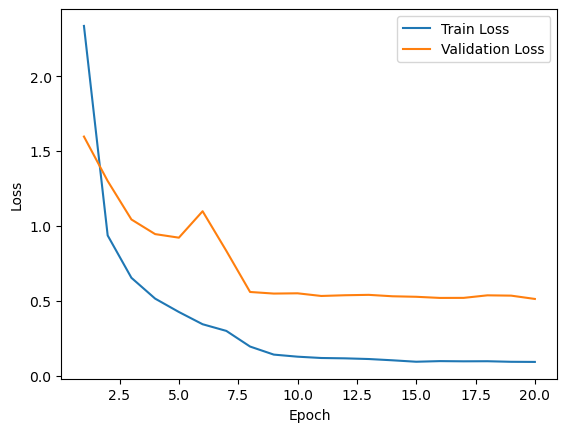

In [22]:
import matplotlib.pyplot as plt

# Lists to store loss values for plotting
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print('Epoch2 {}/{}'.format(epoch+1, num_epochs))
    print('-' * 10)
    for phase in ['train', 'valid']:
        if phase == 'train':
            dataloader = train_loader
            model.train()
        else:
            dataloader = valid_loader
            model.eval()

        running_loss = 0.0
        running_corrects = 0.0  # Initialize as float32

        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # Convert  the loss and running_corrects tensors to float32
            loss = loss.float()
            running_corrects += torch.sum(preds == labels.data).float()

            running_loss += loss.item() * inputs.size(0)
        if phase == 'train':
            step_lr_scheduler.step()

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects / len(dataloader.dataset)  # Update this line

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            phase, epoch_loss, epoch_acc))

        # Save loss values for plotting
        if phase == 'train':
            train_losses.append(epoch_loss)
        else:
            valid_losses.append(epoch_loss)

print('Training complete')

# Plot the loss values
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.05
    lr: 0.0005000000000000001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
